<a href="https://colab.research.google.com/github/M-Nassef/ros-2023-thd/blob/main/Lab09_1_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dogs vs. Cats Classification

Select free T4 GPU in Runtime settings

## Download data

In [11]:
!pip install -q gdown
!gdown https://drive.google.com/uc?id=12WhCCpKTWpeBztLegcoYx2gMo2KbaxDG

Downloading...
From (original): https://drive.google.com/uc?id=12WhCCpKTWpeBztLegcoYx2gMo2KbaxDG
From (redirected): https://drive.google.com/uc?id=12WhCCpKTWpeBztLegcoYx2gMo2KbaxDG&confirm=t&uuid=0276195e-1200-47b2-8621-04c6cf067a2d
To: /content/dogs-vs-cats.zip
100% 852M/852M [00:08<00:00, 105MB/s] 


In [2]:
import zipfile

with zipfile.ZipFile('dogs-vs-cats.zip', 'r') as zip_file:
    zip_file.extractall('data')

with zipfile.ZipFile('data/train.zip', 'r') as zip_file:
    zip_file.extractall('data/')

In [ ]:
## Prepare load

In [3]:
import os
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Paths
base_dir = 'data/train'
train_dir = 'data/train_split'
val_dir = 'data/val_split'

# Create directories
os.makedirs(os.path.join(train_dir, 'dogs'), exist_ok=True)
os.makedirs(os.path.join(train_dir, 'cats'), exist_ok=True)
os.makedirs(os.path.join(val_dir, 'dogs'), exist_ok=True)
os.makedirs(os.path.join(val_dir, 'cats'), exist_ok=True)

# Split data
filenames = os.listdir(base_dir)
train_files, val_files = train_test_split(filenames, test_size=0.2, random_state=42)

for file in train_files:
    if 'dog' in file:
        shutil.move(os.path.join(base_dir, file), os.path.join(train_dir, 'dogs', file))
    elif 'cat' in file:
        shutil.move(os.path.join(base_dir, file), os.path.join(train_dir, 'cats', file))

for file in val_files:
    if 'dog' in file:
        shutil.move(os.path.join(base_dir, file), os.path.join(val_dir, 'dogs', file))
    elif 'cat' in file:
        shutil.move(os.path.join(base_dir, file), os.path.join(val_dir, 'cats', file))

## Create data generators

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Load data from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


## Create basic CNN classification model

In [15]:
from tensorflow.keras import models, layers,regularizers

# Build the model
model_basic = models.Sequential([
    layers.Input(shape=(150, 150, 3)),
    layers.Conv2D(32, (3, 3), kernel_regularizer=regularizers.l2(0.001), activation='relu'),
    layers.Dropout(0.5),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), kernel_regularizer=regularizers.l2(0.001), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_basic.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

## Train basic model

In [16]:
history_model_basic = model_basic.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 63ms/step - accuracy: 0.5748 - loss: 0.7805 - val_accuracy: 0.6066 - val_loss: 0.6821
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 68ms/step - accuracy: 0.7357 - loss: 0.5409 - val_accuracy: 0.7522 - val_loss: 0.5335
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 65ms/step - accuracy: 0.8048 - loss: 0.4450 - val_accuracy: 0.7776 - val_loss: 0.4791
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - accuracy: 0.8480 - loss: 0.3636 - val_accuracy: 0.7782 - val_loss: 0.4962
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 64ms/step - accuracy: 0.8893 - loss: 0.2824 - val_accuracy: 0.7910 - val_loss: 0.4957
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.9356 - loss: 0.1904 - val_accuracy: 0.7946 - val_loss: 0.5334
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 68ms/step - accuracy: 0.9664 - loss: 0.1201 - val_accuracy: 0.7676 - val_loss: 0.8754
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 60ms/step - accuracy: 0.9816 - loss: 0.0828 - 

## Plot accuracy and loss

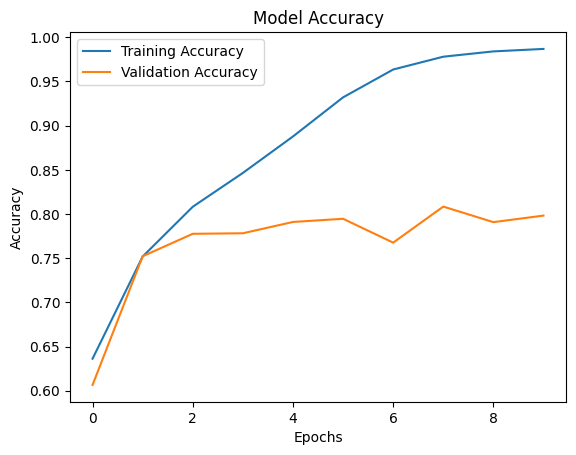

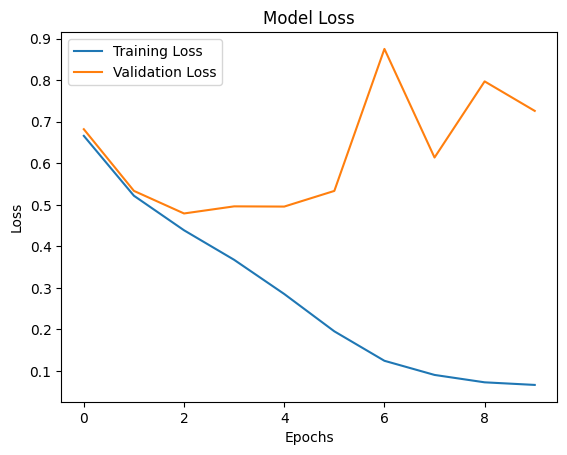

In [17]:
plt.plot(history_model_basic.history['accuracy'], label='Training Accuracy')
plt.plot(history_model_basic.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history_model_basic.history['loss'], label='Training Loss')
plt.plot(history_model_basic.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Tasks

## Add regularization

- Copy the model from above and rename
- Add different regularization methods as described in the lab instructions and evaluate results.




In [ ]:
# TODO
